# Настройка pandas

In [1]:
# импортируем numpy и pandas
import numpy as np
import pandas as pd

# импортируем datetime
import datetime
from datetime import datetime, date

# задаем некоторые настройки pandas, регулирующие
# формат вывода
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# импортируем matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка и организация данных о котировках акций, предоставляемых веб-сервисом Google Finance

In [2]:
# импортируем пакет pandas_datareader
import pandas_datareader as pdr

# считываем данные с Google Finance по акциям конкретной 
# компании за конкретный период, ticker - это торговый код
# акции, start и end - стартовая и конечная даты 
def get_stock_data(ticker, start, end):
    # считываем данные
    data = pdr.data.DataReader(ticker, 'yahoo', start, end)

    # переименовываем этот столбец
    data.insert(0, "Ticker", ticker)
    return data

In [3]:
# запрашиваем данные для торгового кода MSFT
# за трехлетний период
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
get_stock_data("MSFT", start, end)[:5]

           Ticker       Open       High        Low  \
Date                                                 
2012-01-03   MSFT  26.549999  26.959999  26.389999   
2012-01-04   MSFT  26.820000  27.469999  26.780001   
2012-01-05   MSFT  27.379999  27.730000  27.290001   
2012-01-06   MSFT  27.530001  28.190001  27.530001   
2012-01-09   MSFT  28.049999  28.100000  27.719999   

                Close  Adj Close    Volume  
Date                                        
2012-01-03  26.770000  22.795326  64731500  
2012-01-04  27.400000  23.331791  80516100  
2012-01-05  27.680000  23.570217  56081400  
2012-01-06  28.110001  23.936375  99455500  
2012-01-09  27.740000  23.621305  59706800  

In [4]:
# загружаем данные по нескольким торговым кодам
# акций: задаем список торговых кодов
# start и end - это стартовая и конечная даты
def get_data_for_multiple_stocks(tickers, start, end):
    # мы возвращаем словарь
    stocks = dict()
    # итерируем по всем торговым кодам акций
    for ticker in tickers:
        # загружаем данные по конкретному торговому коду
        s = get_stock_data(ticker, start, end)
        # добавляем их в словарь
        stocks[ticker] = s
    # возвращаем словарь
    return stocks

In [5]:
# загружаем данные по всем интересующим нас акциям
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [6]:
# давайте взглянем на данные по 
# торговому коду MSFT
raw['MSFT'][:5]

           Ticker       Open       High        Low  \
Date                                                 
2012-01-03   MSFT  26.549999  26.959999  26.389999   
2012-01-04   MSFT  26.820000  27.469999  26.780001   
2012-01-05   MSFT  27.379999  27.730000  27.290001   
2012-01-06   MSFT  27.530001  28.190001  27.530001   
2012-01-09   MSFT  28.049999  28.100000  27.719999   

                Close  Adj Close    Volume  
Date                                        
2012-01-03  26.770000  22.795326  64731500  
2012-01-04  27.400000  23.331791  80516100  
2012-01-05  27.680000  23.570217  56081400  
2012-01-06  28.110001  23.936375  99455500  
2012-01-09  27.740000  23.621305  59706800  

In [7]:
# поворачиваем данные, превращая значения столбца Ticker
# в названия столбцов, соотвествующие торговым кодам акций
def pivot_tickers_to_columns(raw, column):
    items = []
    # итерируем по всем ключам словаря
    for key in raw:
        # получаем данные по ключу
        data = raw[key]
        # извлекаем заданный столбец
        subset = data[["Ticker", column]]
        # добавляем к элементам
        items.append(subset)
    
    # конкатенируем все элементы
    combined = pd.concat(items)
    # сбрасываем индекс
    ri = combined.reset_index()
    # возвращаем данные, совершив поворот
    return ri.pivot("Date", "Ticker", column)

In [8]:
# выполняем поворот
close_px = pivot_tickers_to_columns(raw, "Close")
# смотрим результат
close_px[:5]

Ticker             AA       AAPL   DAL    ...      \
Date                                      ...       
2012-01-03  22.179689  58.747143  8.04    ...       
2012-01-04  22.708349  59.062859  8.01    ...       
2012-01-05  22.492081  59.718571  8.33    ...       
2012-01-06  22.011480  60.342857  8.32    ...       
2012-01-09  22.660290  60.247143  8.28    ...       

Ticker           MSFT        PEP        UAL  
Date                                         
2012-01-03  26.770000  66.400002  18.900000  
2012-01-04  27.400000  66.739998  18.520000  
2012-01-05  27.680000  66.220001  18.389999  
2012-01-06  28.110001  65.389999  18.209999  
2012-01-09  27.740000  65.730003  17.930000  

[5 rows x 9 columns]

# Визуализация временных рядов котировок акций

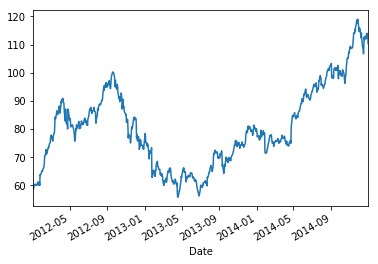

In [9]:
# визуализируем цены закрытия для AAPL
close_px['AAPL'].plot();

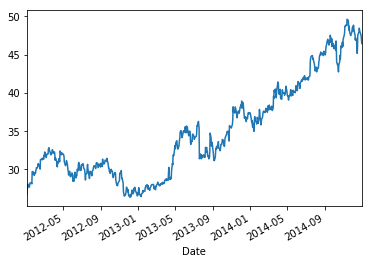

In [10]:
# визуализируем цены закрытия для MSFT
close_px['MSFT'].plot();

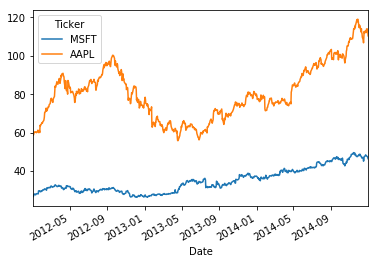

In [11]:
# визуализируем цены закрытия для MSFT и AAPL 
# на одном и том же графике
close_px[['MSFT', 'AAPL']].plot();

# Визуализация временных рядов объемов торгов

In [12]:
# совершаем поворот, превратив данные 
# об объемах торгов в столбцы
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker           AA      AAPL      DAL   ...         MSFT  \
Date                                     ...                
2014-12-24  2057400  14479600  4296200   ...     11437800   
2014-12-26  2644900  33721000  5303100   ...     13197800   
2014-12-29  2949500  27598900  6656700   ...     14439500   
2014-12-30  3854300  29881500  7318900   ...     16384700   
2014-12-31  3679600  41403400  7801700   ...     21552500   

Ticker          PEP      UAL  
Date                          
2014-12-24  1604100  2714300  
2014-12-26  1492700  3062200  
2014-12-29  2453800  2874300  
2014-12-30  2134400  2644600  
2014-12-31  3727400  4451200  

[5 rows x 9 columns]

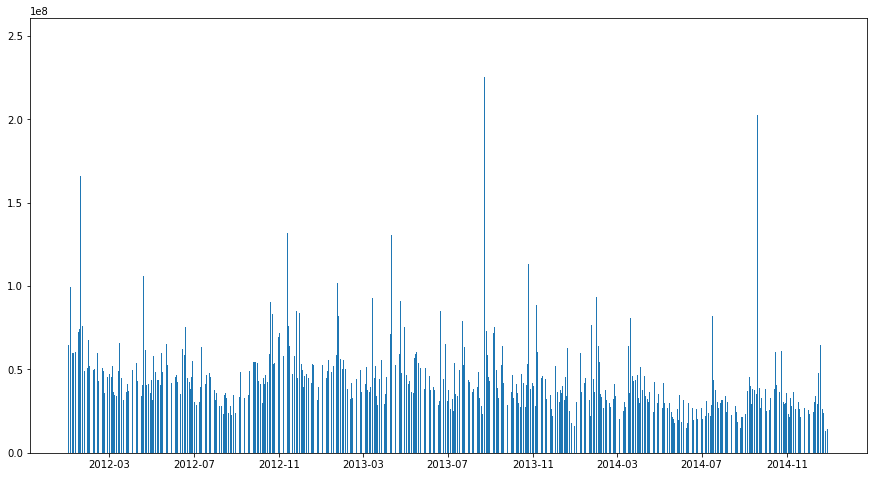

In [13]:
# визуализируем данные об объеме торгов для MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

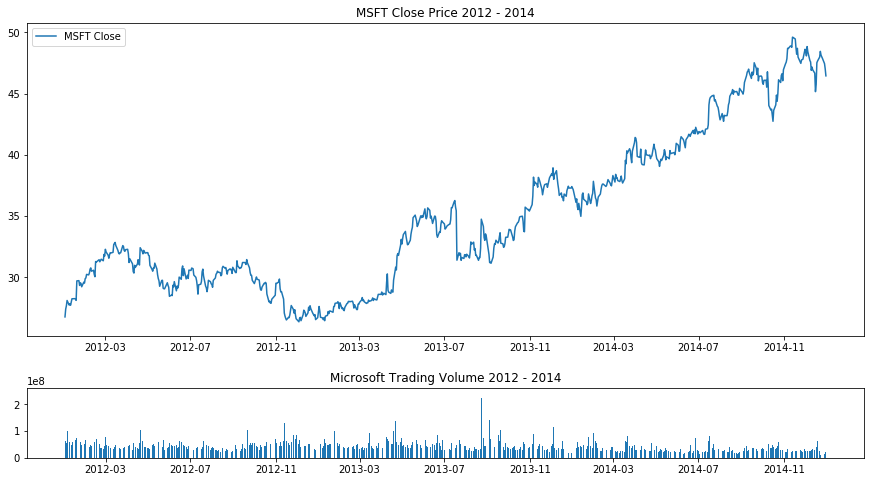

In [14]:
# в верхней части размещаем график цены закрытия
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# в нижней части размещаем график объема торгов
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Вычисление простого ежедневного процентного изменения цены закрытия

In [15]:
# вычисляем ежедневное процентное изменение
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker            AA      AAPL       DAL    ...     \
Date                                        ...      
2012-01-03       NaN       NaN       NaN    ...      
2012-01-04  0.023835  0.005374 -0.003731    ...      
2012-01-05 -0.009524  0.011102  0.039950    ...      
2012-01-06 -0.021368  0.010454 -0.001200    ...      
2012-01-09  0.029476 -0.001586 -0.004808    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  0.023534  0.005120 -0.020106  
2012-01-05  0.010219 -0.007791 -0.007019  
2012-01-06  0.015535 -0.012534 -0.009788  
2012-01-09 -0.013163  0.005200 -0.015376  

[5 rows x 9 columns]

In [16]:
# вычислим вручную процентное изменение 
# цены закрытия для AAPL за 2012-01-05
close_px.loc['2012-01-05']['AAPL'] / \
    close_px.loc['2012-01-04']['AAPL'] -1

0.011101934635436406

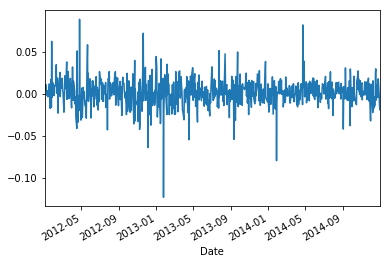

In [17]:
# строим график процентного изменения 
# цены закрытия для AAPL
daily_pc["AAPL"].plot();

# Вычисление простой ежедневной накопленной доходности

In [18]:
# вычисляем ежедневную накопленную доходность
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker            AA      AAPL       DAL    ...     \
Date                                        ...      
2012-01-03       NaN       NaN       NaN    ...      
2012-01-04  1.023835  1.005374  0.996269    ...      
2012-01-05  1.014085  1.016536  1.036070    ...      
2012-01-06  0.992416  1.027162  1.034826    ...      
2012-01-09  1.021669  1.025533  1.029851    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  1.023534  1.005120  0.979894  
2012-01-05  1.033993  0.997289  0.973016  
2012-01-06  1.050056  0.984789  0.963492  
2012-01-09  1.036235  0.989910  0.948677  

[5 rows x 9 columns]

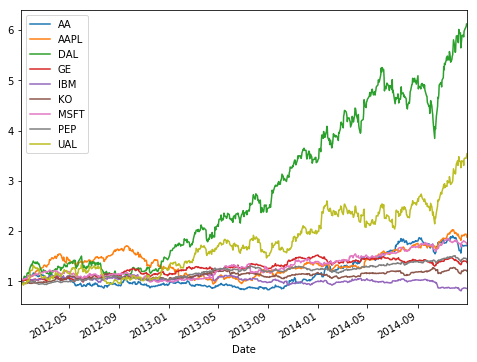

In [19]:
# строим графики накопленной доходности по всем акциям,
# чтобы получить представление об эффективности
# вложений в эти акции
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Изменение шага дискретизации временного ряда для вычисления ежемесячной доходности вместо ежедневной

In [20]:
# изменяем шаг дискретизации временного ряда и 
# заполняем пропущенные значения
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker             AA       AAPL    DAL  ...         MSFT  \
Date                                     ...                
2012-01-31  24.414480  65.211426  10.55  ...    29.530001   
2012-02-29  24.438511  77.491432   9.81  ...    31.740000   
2012-03-31  24.438511  77.491432   9.81  ...    31.740000   
2012-04-30  23.381189  83.425713  10.96  ...    32.020000   
2012-05-31  20.545650  82.532860  12.10  ...    29.190001   

Ticker            PEP    UAL  
Date                          
2012-01-31  65.669998  23.10  
2012-02-29  62.939999  20.65  
2012-03-31  62.939999  20.65  
2012-04-30  66.000000  21.92  
2012-05-31  67.849998  25.17  

[5 rows x 9 columns]

In [21]:
# вычисляем ежемесячные процентные изменения
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker            AA      AAPL       DAL    ...     \
Date                                        ...      
2012-01-31       NaN       NaN       NaN    ...      
2012-02-29  0.000984  0.188311 -0.070142    ...      
2012-03-31  0.000000  0.000000  0.000000    ...      
2012-04-30 -0.043265  0.076580  0.117227    ...      
2012-05-31 -0.121274 -0.010702  0.104015    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-31       NaN       NaN       NaN  
2012-02-29  0.074839 -0.041571 -0.106061  
2012-03-31  0.000000  0.000000  0.000000  
2012-04-30  0.008822  0.048618  0.061501  
2012-05-31 -0.088382  0.028030  0.148266  

[5 rows x 9 columns]

In [22]:
# вычисляем ежемесячную накопленную доходность
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker            AA      AAPL       DAL    ...     \
Date                                        ...      
2012-01-31       NaN       NaN       NaN    ...      
2012-02-29  1.000984  1.188311  0.929858    ...      
2012-03-31  1.000984  1.188311  0.929858    ...      
2012-04-30  0.957677  1.279311  1.038863    ...      
2012-05-31  0.841535  1.265620  1.146919    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-31       NaN       NaN       NaN  
2012-02-29  1.074839  0.958429  0.893939  
2012-03-31  1.074839  0.958429  0.893939  
2012-04-30  1.084321  1.005025  0.948918  
2012-05-31  0.988486  1.033196  1.089610  

[5 rows x 9 columns]

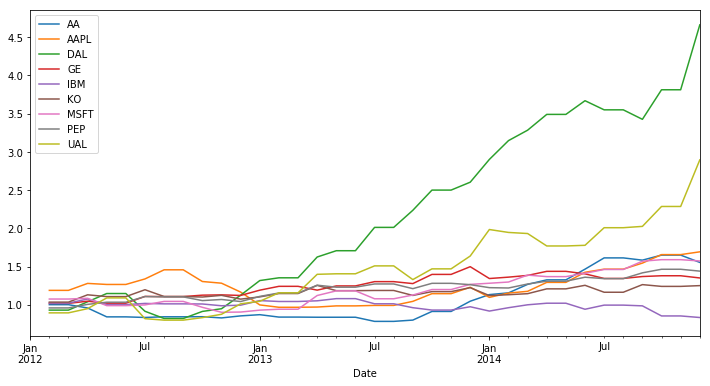

In [23]:
# строим графики ежемесячной накопленной 
# доходности по всем акциям
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Анализ распределения доходности

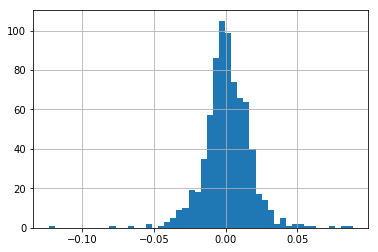

In [24]:
# гистограмма ежедневного процентного изменения для AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

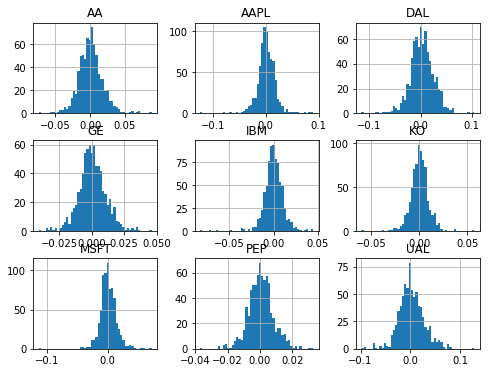

In [25]:
# матрица гистограмм ежедневных процентных изменений
daily_pc.hist(bins=50, figsize=(8,6));

# Выполнение вычислений на основе скользящего среднего

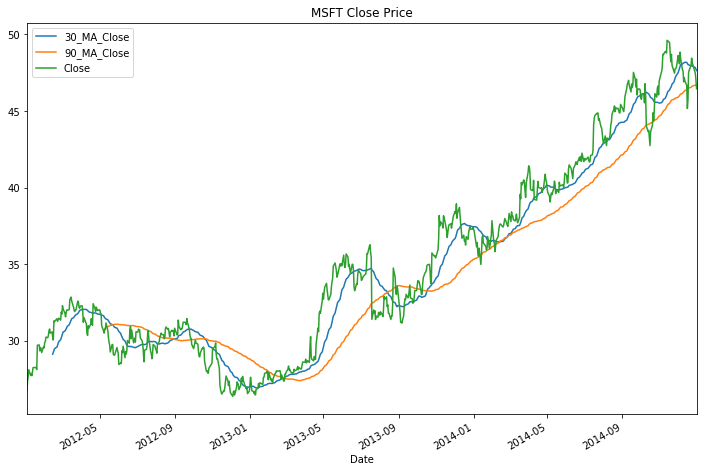

In [26]:
# извлекаем только цену закрытия MSFT
msft_close = close_px[['MSFT']]['MSFT']
# вычисляем 30- и 90-дневные скользящие средние
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# записываем в объект DataFrame, серии которого
# будем визуализировать
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# визуализируем все серии на одном и том же графике
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Сравнение средних ежедневных доходностей акций

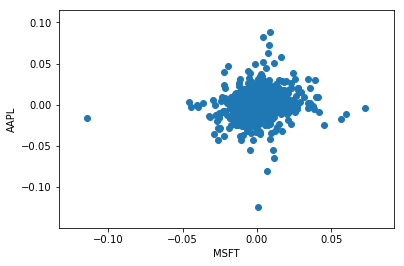

In [27]:
# визуализируем взаимосвязь между ежедневным процентным 
# изменением цены закрытия MSFT и ежедневным процентным 
# изменением цены закрытия AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

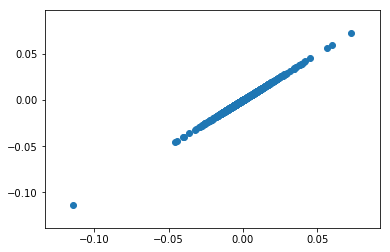

In [28]:
# демонстрируем идеальную корреляцию
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

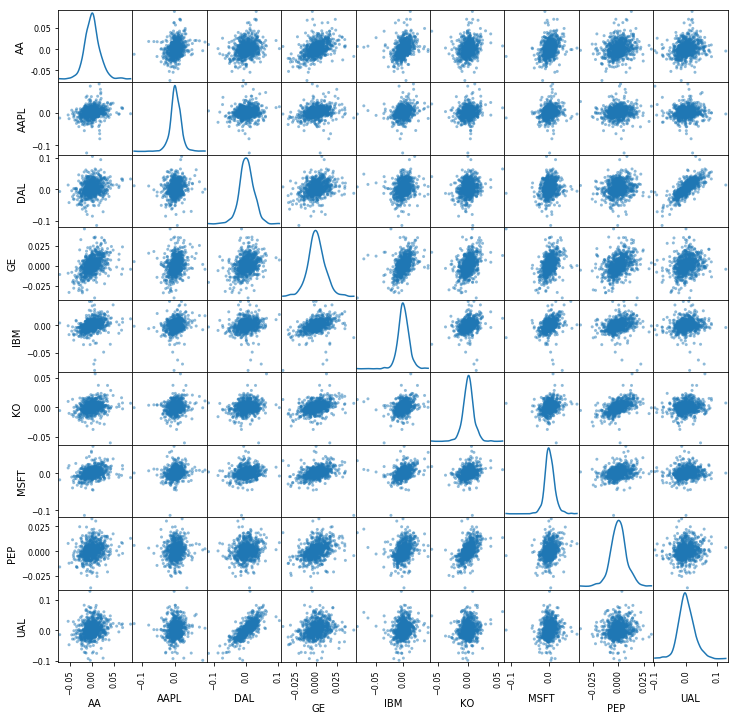

In [29]:
from pandas.plotting import scatter_matrix
# строим матрицу диаграмм рассеяния, чтобы 
# визуализировать корреляции между всеми акциями
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Корреляция между котировками на основе ежедневного процентного изменения цены закрытия

In [30]:
# вычисляем корреляции между котировками акций на основе 
# ежедневного процентного изменения цены закрытия
corrs = daily_pc.corr()
corrs

Ticker        AA      AAPL       DAL    ...         MSFT  \
Ticker                                  ...                
AA      1.000000  0.238155  0.250570    ...     0.310952   
AAPL    0.238155  1.000000  0.136758    ...     0.182782   
DAL     0.250570  0.136758  1.000000    ...     0.152909   
GE      0.458091  0.238882  0.318261    ...     0.340142   
IBM     0.311186  0.213496  0.166218    ...     0.354350   
KO      0.225809  0.157887  0.187431    ...     0.267558   
MSFT    0.310952  0.182782  0.152909    ...     1.000000   
PEP     0.221750  0.096902  0.174172    ...     0.280875   
UAL     0.221425  0.061735  0.761222    ...     0.128079   

Ticker       PEP       UAL  
Ticker                      
AA      0.221750  0.221425  
AAPL    0.096902  0.061735  
DAL     0.174172  0.761222  
GE      0.373410  0.236525  
IBM     0.252805  0.122614  
KO      0.553574  0.139971  
MSFT    0.280875  0.128079  
PEP     1.000000  0.124301  
UAL     0.124301  1.000000  

[9 rows x 9 columns

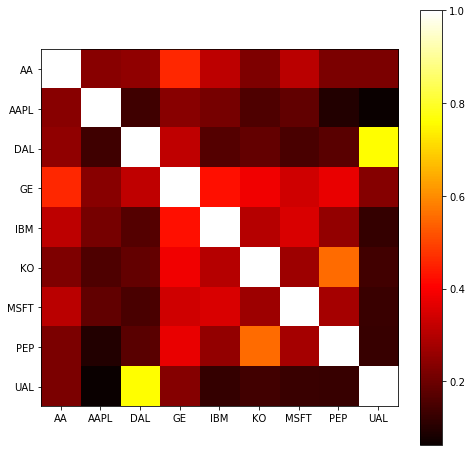

In [31]:
# строим теплокарту корреляционной матрицы
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Волатильность

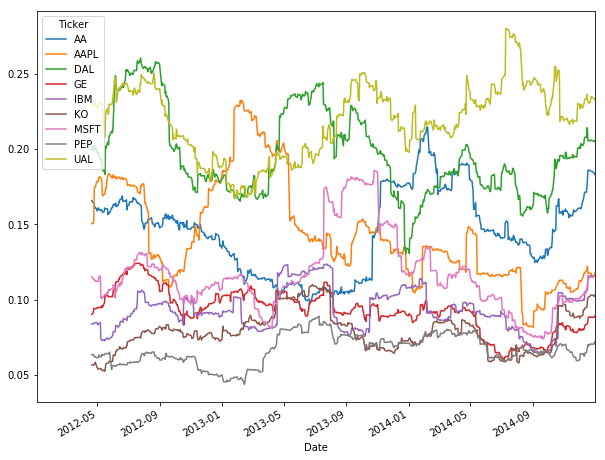

In [32]:
# минимум, состоящий из 75 периодов
min_periods = 75
# вычисляем волатильность
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# визуализируем ее
vol.plot(figsize=(10, 8));

# Визуализация взаимосвязи между риском и ожидаемой доходностью

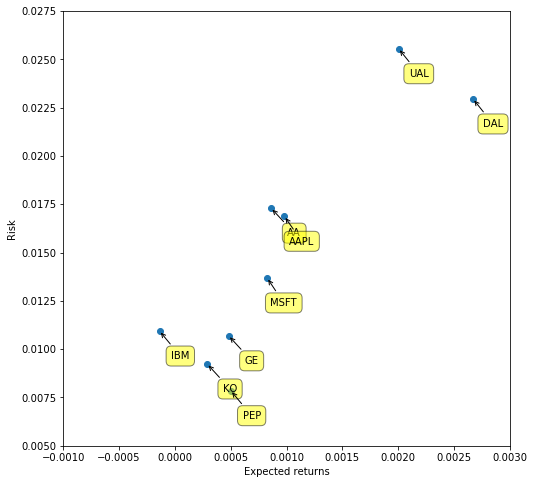

In [33]:
# строим диаграмму рассеяния, сопоставляя среднее и
# стандартное отклонение ежедневного процентного изменения
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# добавляем метки к каждой точке
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# задаем диапазоны для лучшего представления
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# задаем размер
plt.gcf().set_size_inches(8,8)